<a href="https://colab.research.google.com/github/sepaharvey/Fantasy-Football-Python-Refresh/blob/main/Section_6_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Read more about pd.set_option here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
"""

import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt




In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202022.csv').iloc[:,1:]

df.head()


,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints
0,Patrick Mahomes*+,KAN,QB,27,17,17,1,1,5250,41,648,435,358,4,61,6,0,12,5,0,1.0,2.0,417.4
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8
4,Justin Jefferson*+,MIN,WR,23,17,17,184,128,34,0,2,2,24,1,4,1809,8,0,0,0,1.0,NaN,368.7


In [3]:
"""
View the documentation for the info method here
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
"""
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         650 non-null    object 
 1   Tm             650 non-null    object 
 2   Pos            578 non-null    object 
 3   Age            650 non-null    int64  
 4   G              650 non-null    int64  
 5   GS             650 non-null    int64  
 6   Tgt            650 non-null    int64  
 7   Rec            650 non-null    int64  
 8   PassingYds     650 non-null    int64  
 9   PassingTD      650 non-null    int64  
 10  PassingAtt     650 non-null    int64  
 11  PassingCmp     650 non-null    int64  
 12  RushingYds     650 non-null    int64  
 13  RushingTD      650 non-null    int64  
 14  RushingAtt     650 non-null    int64  
 15  ReceivingYds   650 non-null    int64  
 16  ReceivingTD    650 non-null    int64  
 17  Int            650 non-null    int64  
 18  Fumbles   

In [4]:
pd.set_option('chained_assignment', None) # we don't care about overriding the original df

# you could also do rb_df = df.loc[df['Pos'] == 'RB'].copy()
rb_df = df.loc[df['Pos'] == 'RB']

# Usage is defined as Tgt + RushingAtt
rb_df['Usage/G'] = (rb_df['Tgt'] + rb_df['RushingAtt']) / rb_df['G']

rb_df['FantasyPoints/G'] = rb_df['FantasyPoints'] / rb_df['G']

"""
Here, we're just looking at the last column of our DataFrame here.
"""

rb_df.iloc[:, -1:].head()

,FantasyPoints/G
1,19.311765
2,20.964706
3,18.925000
5,21.923529
9,16.552941


In [5]:
rb_columns = ['Player', 'RushingAtt', 'RushingYds', 'RushingTD']


rb_df_ex = df.loc[df['Pos'] == 'RB', rb_columns]

rb_df_ex[:1]

,Player,RushingAtt,RushingYds,RushingTD
1,Josh Jacobs*+,340,1653,12


<Axes: xlabel='RushingAtt', ylabel='Tgt'>

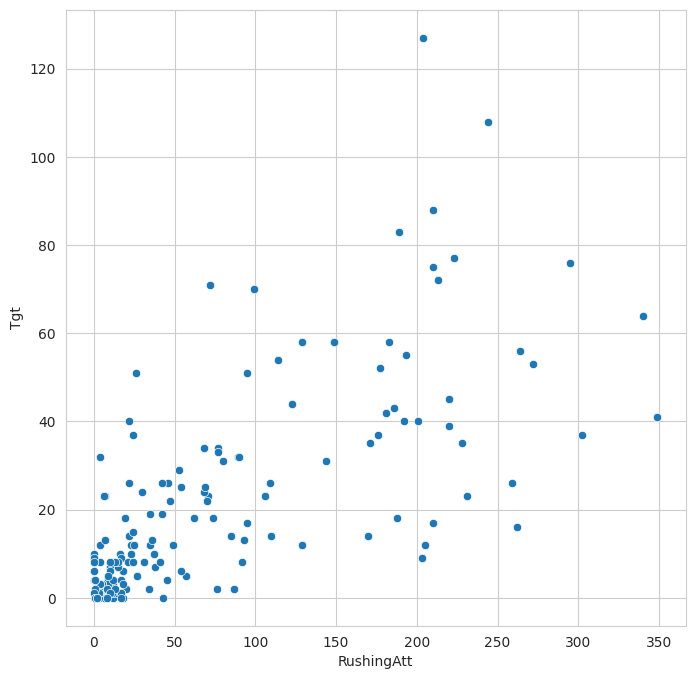

In [6]:
sns.set_style('whitegrid')

"""
seaborn documentation for scatter plots:
https://seaborn.pydata.org/generated/seaborn.scatterplot.html
"""


plt.figure(figsize = (8, 8))


sns.scatterplot(x=rb_df['RushingAtt'], y = rb_df['Tgt'])

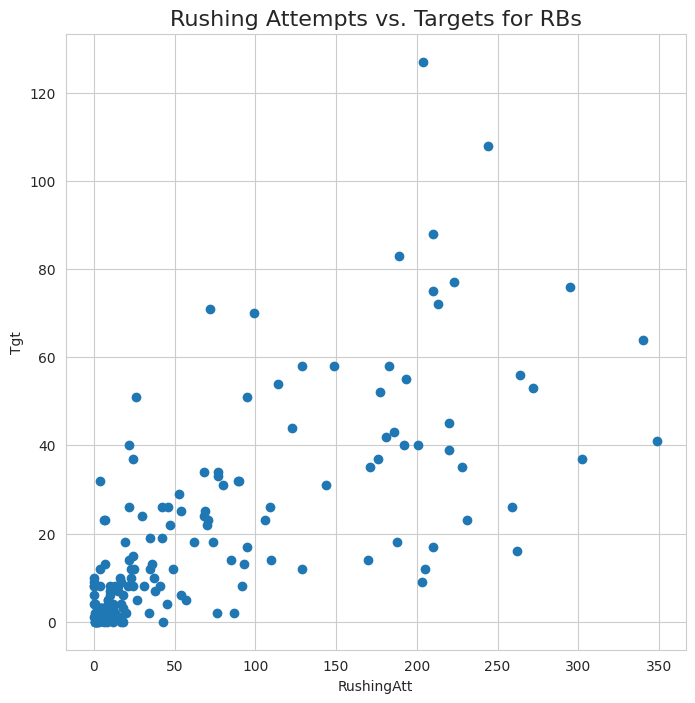

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(rb_df['RushingAtt'], rb_df['Tgt'])
plt.xlabel('RushingAtt')
plt.ylabel('Tgt')
plt.title('Rushing Attempts vs. Targets for RBs', fontsize=16)
plt.show()

<Axes: xlabel='Usage/G', ylabel='FantasyPoints/G'>

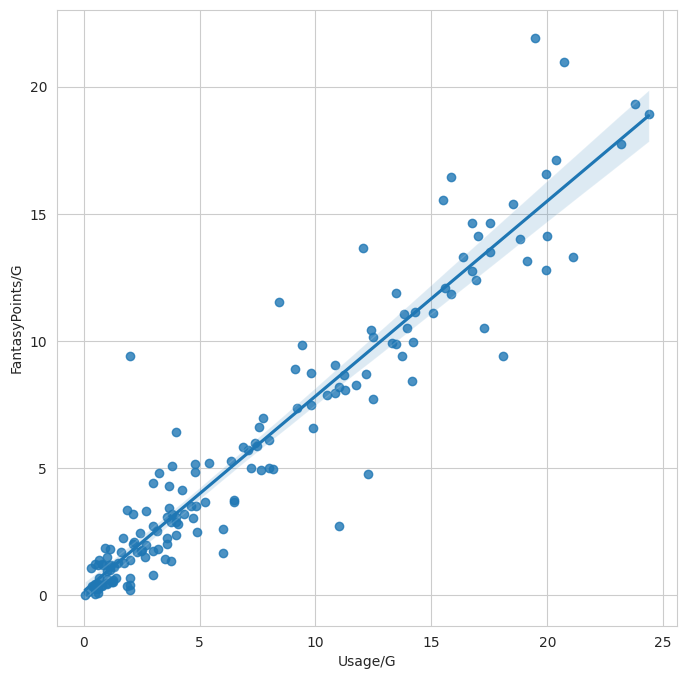

In [8]:
"""
documentation for sns.regplot

https://seaborn.pydata.org/generated/seaborn.regplot.html
"""


plt.figure(figsize=(8, 8))
sns.regplot(x=rb_df['Usage/G'], y = rb_df['FantasyPoints/G'])

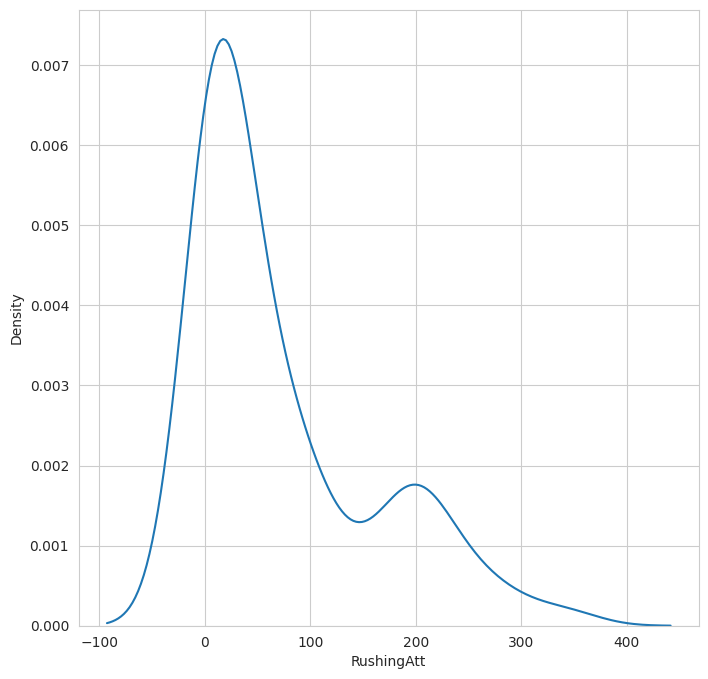

In [9]:
# kernel density restimation for RB rushing attempts
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot
plt.figure(figsize=(8, 8))
sns.kdeplot(rb_df['RushingAtt']);

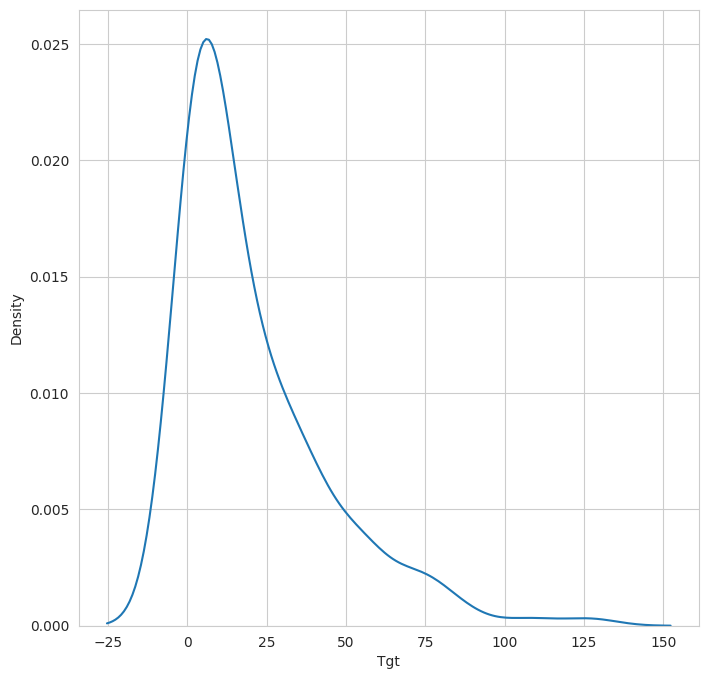

In [10]:
plt.figure(figsize=(8, 8))
sns.kdeplot(rb_df['Tgt']);


<Figure size 800x800 with 0 Axes>

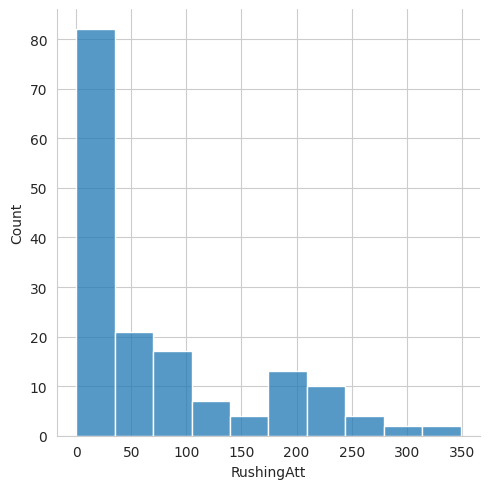

In [11]:
plt.figure(figsize=(8, 8))
sns.displot(rb_df['RushingAtt']);

<Figure size 800x800 with 0 Axes>

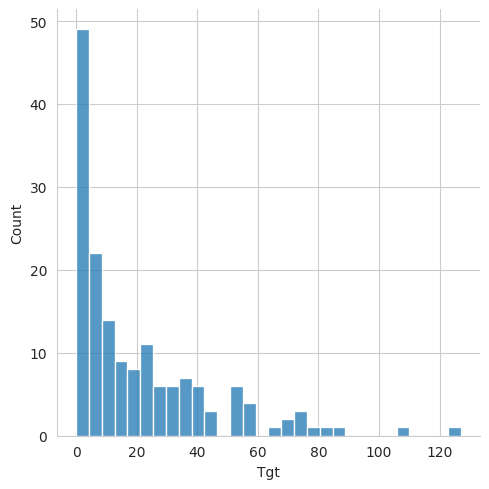

In [12]:
plt.figure(figsize = (8,8))

sns.displot(rb_df["Tgt"], bins = 30)

<Axes: xlabel='RushingAtt', ylabel='Count'>

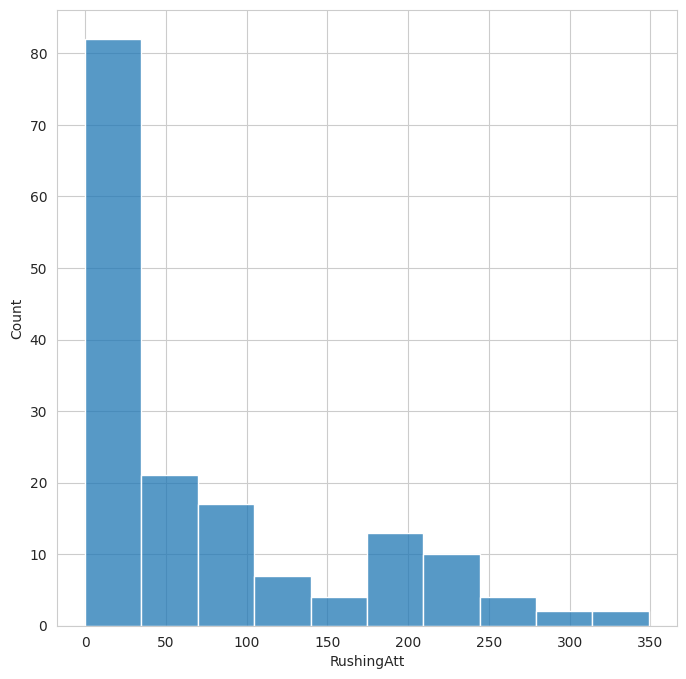

In [13]:
plt.figure(figsize = (8,8))

sns.histplot(rb_df['RushingAtt'])



<Axes: xlabel='RushingAtt', ylabel='Tgt'>

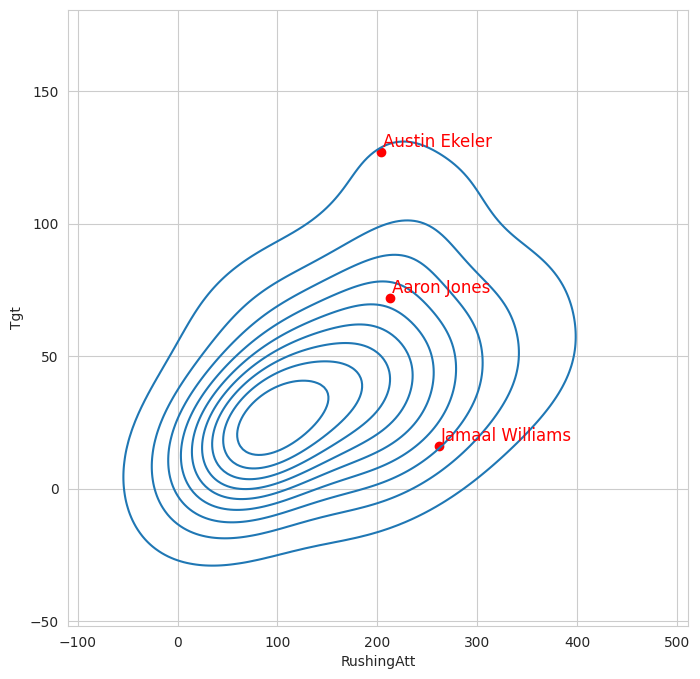

In [34]:
"""
Here, we use the object-oriented API for matplotlib to be able to have greater
control over our plot.

We can use the fig and ax objects we get back from the plt.subplots function to annotate points
for example.

https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.subplots.html

matplotlib Axes object

https://matplotlib.org/3.3.0/api/axes_api.html

matplotlib Figure object

https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.figure.Figure.html

"""



fig, ax = plt.subplots(figsize = (8,8))

notable_players = [
    'Austin Ekeler',
    'Aaron Jones',
    'Jamaal Williams'
]


rb_df_filtered = rb_df.loc[rb_df['RushingAtt'] > 50]

for player_name in notable_players:

  player = rb_df_filtered.loc[rb_df_filtered['Player'] == player_name]


  #if our df we get back is not empty, run the code below

  if not player.empty:
    #grab targets and rushing attempts
    targets = player['Tgt'].iloc[0]  # .iloc[0] resolves FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0])
    attempts = player['RushingAtt'].iloc[0]




    ax.annotate(player_name, xy=(attempts+2, targets+2), color = 'red', fontsize = 12)
    ax.scatter(attempts, targets, color = 'red')


# set ax parameter to the ax we created above with plt.subplots
sns.kdeplot(x=rb_df_filtered['RushingAtt'], y = rb_df_filtered['Tgt'], ax=ax, bw_method=0.7)
